In [5]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/ACI.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08          ACI  375.0  ...  361.8    453      13.478  36,659
1  438 2018-06-08          ACI  373.0  ...  370.6    759      25.894  69,069
2  437 2018-07-08          ACI  373.6  ...  373.8    368      11.013  29,387
3  436 2018-08-08          ACI  369.8  ...  373.0    359       9.561  25,798
4  435 2018-09-08          ACI  365.4  ...  369.1    461      15.324  41,913

[5 rows x 12 columns]

In [6]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10          ACI  344.5  ...  340.0    270       6.432  18,549
59  380 2018-01-11          ACI  350.4  ...  349.6    328      10.607  30,276
37  402 2018-02-10          ACI  347.5  ...  345.3    199       3.682  10,600
79  360 2018-02-12          ACI  322.2  ...  325.2    294       5.220  16,130
16  423 2018-03-09          ACI  364.0  ...  366.5    437      13.092  35,969

[5 rows x 12 columns]

In [7]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH  ...    YCP  TRADE  VALUE (mn)  VOLUME
DATE                                        ...                                  
2018-01-10  403          ACI  344.5  352.8  ...  340.0    270       6.432  18,549
2018-01-11  380          ACI  350.4  351.6  ...  349.6    328      10.607  30,276
2018-02-10  402          ACI  347.5  349.0  ...  345.3    199       3.682  10,600

[3 rows x 11 columns]

In [8]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [9]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [10]:
df['volatility'] = df['volatility']*100

In [11]:
import matplotlib.pyplot as plt 

In [12]:
df=df.reset_index()['volatility']

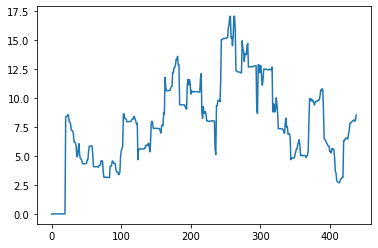

In [13]:
plt.plot(df)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [15]:
df.shape

(439, 1)

In [16]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [17]:

training_size,test_size

(307, 132)

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
from keras.optimizers import Adam

In [24]:

#1D cnn model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                156850    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 157,093
Trainable params: 157,093
Non-trainable params: 0
_________________________________________________________________


In [26]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 85ms/step - loss: 0.1282 - val_loss: 0.0205
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0436 - val_loss: 0.0807
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0253 - val_loss: 0.0298
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0185 - val_loss: 0.0510
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 0.0325
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0117 - val_loss: 0.0399
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0103 - val_loss: 0.0328
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.0266
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0103 - val_loss: 0.0374
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0082 - val_loss: 0.0216
Epoch 11/100
7/7 [=

In [27]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [28]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [30]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

2.386613427006828

In [31]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)

MAE: 1.876414


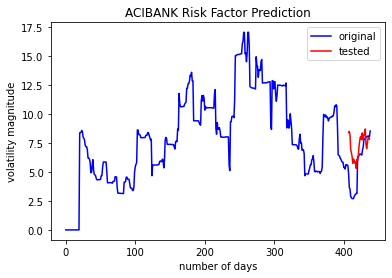

In [32]:
Y_test
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
#plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ACIBANK Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [33]:
len(test_data)

132

In [34]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.4686425]
101
1 day input [0.40347607 0.40676387 0.40463047 0.38739803 0.27421549 0.28337759
 0.2833259  0.28286761 0.28310761 0.28264977 0.30068437 0.31316072
 0.32948386 0.32899958 0.35512618 0.35708615 0.37557857 0.34493845
 0.29573309 0.29407283 0.29733074 0.29695707 0.29339656 0.29531466
 0.29484175 0.29491749 0.28571011 0.29443713 0.29711445 0.31799932
 0.46690862 0.58429257 0.57917951 0.57298744 0.5814854  0.56842312
 0.57262542 0.56395035 0.5514931  0.56594669 0.56663393 0.57056145
 0.57041684 0.57510459 0.57369617 0.5781223  0.59676788 0.62695655
 0.62323902 0.63349573 0.62747912 0.51794705 0.37955403 0.37665634
 0.37363478 0.36163028 0.35700648 0.34773668 0.34249096 0.34173258
 0.3162313  0.31596909 0.30805393 0.32992379 0.32621335 0.32904206
 0.32417619 0.28367114 0.21379886 0.20763901 0.1702758  0.16276553
 0.1584907  0.15837001 0.15822192 0.16912667 0.17625208 0.18041492
 0.18467332 0.1842036  0.37062997 0.37037881 0.37784127 0.38369051
 0.38390788 0.38040596 0.37895565 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [39]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [40]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

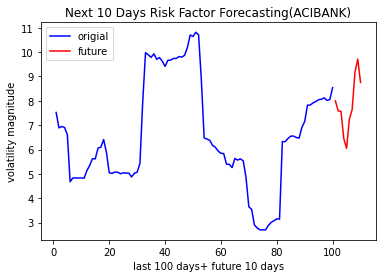

In [41]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Risk Factor Forecasting(ACIBANK)')
plt.legend(loc='best')
plt.show(block=False)

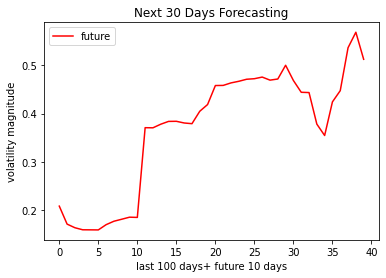

In [42]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [43]:
df3=scaler.inverse_transform(df3).tolist()

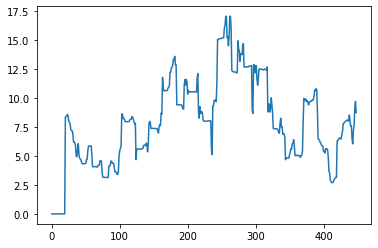

In [44]:
plt.plot(df3)